<a href="https://colab.research.google.com/github/yunju-1118/ESAA/blob/main/ESAA_YB_week1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 핸들링 - 판다스

판다스는 파이썬에서 데이터 처리를 위해 존재하는 가장 인기 있는 라이브러리이다. 일반적으로 대부분의 데이터 세트는 2차원 데이터로, 이는 인간이 가장 이해하기 쉬운 구조이면서도 효과적으로 데이터를 담을 수 있는 구조이다. 판다스는 이처럼 행과 열로 이뤄진 2차원 데이터를 효율적으로 가공/처리할 수 있는 다양하고 훌륭한 기능을 제공한다.

판다스는 파이썬의 리스트, 컬렉션, 넘파이 등의 내부 데이터 뿐만 아니라 CSV 등의 파일을 쉽게 DataFrame으로 변경해 데이터의 가공/분석을 편리하게 수행할 수 있게 만들어준다.

판다스의 핵심 객체는 DataFrame이다. 이러한 DataFrame을 이해하기 위해 다른 중요 객체인 Index와 Series를 이해하는 것도 중요하다. Index는 RDBMS의 PK처럼 개별 데이터를 고유하게 식별하는 key 값이다. Series와 DataFrame은 모두 Index를 Key 값으로 가지고 있다. Series와 DataFrame의 가장 큰 차이는 Series는 col이 하나뿐인 데이터 구조체이고, DataFrame은 col이 여러 개인 데이터 구조체라는 것이다. 따라서, DataFrame은 여러 개의 Series로 이뤄졌다고 할 수 있다.

## 판다스 시작 - 파일을 DataFrame으로 로딩, 기본 API

판다스 모듈을 임포트하는 것으로 판다스를 시작해보자. pandas를 pd로 alias해 임포트하는 것이 관례이다.

In [151]:
import pandas as pd

다음으로는 데이터 파일을 판다스의 DataFrame으로 로딩할 것이다. 사용할 데이터 파일은 캐글(Kaggle)에서 제공하는 타이타닉 탑승자 파일이다. 해당 데이터의 train.csv 파일을 titanic_train.csv 라는 파일명으로 변경해 저장한다.

판다스는 다양한 포맷으로된 파일을 DataFrame으로 로딩할 수 있는 편리한 API를 제공한다. 대표적으로는 read_csv(), read_table(), read_fwf()가 있다. read_csv()는 CSV 파일 포맷 변환을 위한 API이다. read_table()과 read_csv()의 가장 큰 차이는 필드 구분 문자가 콤마(',')냐, 탭('\t')이냐의 차이이다. read_table의 디폴트 필드 구분 문자는 탭 문자이다.

read_csv()는 CSV 뿐만 아니라 어떤 필드 구분 문자 기반의 파일 포맷도 DataFrame으로 변환이 가능하다. read_csv()의 인자인 sep에 해당 구분 문자를 입력하면 된다. read_csv()에서 sep 인자를 생략하면 자동으로 콤마로 할당한다. read_fwf()는 Fixed Width, 즉 고정 길이 기반의 칼럼 포맷을 DataFrame으로 로딩하기 위한 API이다.

read_csv(filepath_or_buffer, sep=',', ...) 함수에서 가장 중요한 인자는 filepath이다. 나머지 인자는 지정하지 않으면 디폴트 값으로 할당된다. Filepath에는 로드하려는 데이터 파일의 경로를 포함한 파일명을 입력한다.

In [152]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
print('titanic 변수 type: ', type(titanic_df))

titanic 변수 type:  <class 'pandas.core.frame.DataFrame'>


pd.read_csv()는 호출 시 파일명 인자로 들어온 파일을 로딩해 DataFrame 객체로 반환한다. DataFrame 객체를 잠시 살펴보면 데이터 파일의 첫 번째 줄에 있던 칼럼 문자열이 DataFrame의 칼럼으로 할당된다. read_csv()는 별다른 파라미터 지정이 없으면 파일의 맨 처음 로우를 칼럼명으로 인지하고 칼럼으로 변환한다. 그리고 콤마로 분리된 데이터값들이 해당 칼럼에 맞게 할당된다. 그런데 맨 왼쪽을 보면 파일에 기재 되어있지 않는 데이터 값이 로우 순으로 0,1,2,3... 과 같이 순차적으로 표시되어있음을 알 수 있다. 칼럼명도 표시되지 않는 이 데이터들은 바로 판다스의 Index 객체 값이다. 모든 DataFrame 내의 데이터는 생성되는 순간 고유의 Index 값을 가지게 된다.

DataFrame의 모든 데이터를 표출하면 보기 불편할 뿐만 아니라 메모리도 많이 사용하므로 일부 데이터만 표출한다. DataFrame.head()는 DataFrame의 맨 앞에 있는 N개의 로우를 반환한다. head(3)은 맨 앞 3개의 로우를 반환하며 default는 5개이다.

In [154]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S


DataFrame의 행과 열 크기를 알아보는 가장 좋은 방법은 생성된 DataFrame 객체의 shape 변수를 이용하는 것이다. shape은 DataFrame의 행과 열을 튜플 형태로 반환한다.

In [155]:
print('DataFrame의 크기: ', titanic_df.shape)

DataFrame의 크기:  (891, 12)


생성된 DataFrame 객체인 titanic_df는 891개의 로우와 12개의 칼럼으로 이루어진다.

DataFrame은 데이터뿐만 아니라 칼럼의 타입, Null 데이터 개수, 데이터 분포도 등의 메타 데이터도 조회가 가능하다. 이를 위한 대표적인 메서드로 info()와 describe()가 있다.

In [156]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


info() 메서드를 통해 총 데이터 건수와 데이터 타입, Null 건수를 알 수 있다.
1. RangeIndex는 DataFrame index의 범위를 나타내므로 전체 row 수를 알 수 있다. 전체 데이터는 891개 row이다. 그리고 column의 개수는 12개이다.
2. Dtype은 칼럼별 데이터 타입을 나타낸다. 가령 Pclass 칼럼의 데이터 타입은 int64형이다. Name 칼럼의 데이터 타입은 object인데, 이는 문자열 타입으로 생각해도 무방하다.
3. Non-Null Count는 몇 개의 데이터가 non-null인지 나타낸다. 가령 Age 칼럼의 714 non-null의 의미는 Age 칼럼 891개 데이터 중 714개가 Null이 아니며 177개는 Null이라는 의미이다.
4. 마지막은 전체 12개의 칼럼들의 타입을 요약한 것이다. 2개 칼럼이 float64, 5개 칼럼이 int64, 5개 칼럼이 object 타입이다.

describe( ) 메서드는 칼럼별 숫자형 데이터값의 n-percentile 분포도, 평균값, 최댓값, 최솟값을 나타낸다. describe( ) 메서드는 오직 숫자형(int, float 등) 칼럼의 분포도만 조사하며 자동으로 object 타입의 칼럼은 출력에서 제외된다.

데이터 분포도를 아는 것은 머신러닝 알고리즘의 성능을 향상시키는 중요한 요소이다. describe( ) 메서드만으로 정확한 분포도를 알기는 무리지만, 개략적인 수준의 분포도를 확인할 수 있어 유용하다.

In [157]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


count는 Not Null인 데이터 건수, mean은 전체 데이터의 평균값, std는 표준편차, min은 최솟값, max는 최댓값이다. 그리고 25%는 25 percentile 값, 50%는 50 percentile 값, 75%sms 75 percentile 값을 의미한다. 또한, describe( ) 해당 숫자 칼럼이 숫자형 카테고리 칼럼인지를 판단할 수 있게 도와준다. 카테고리 칼럼은 특정 범주에 속하는 값을 코드화한 칼럼이다. 가령 성별 컬럼의 경우 '남', '여'가 있고, '남'을 1, '여'를 2와 같이 표현한 것이다.
1. PassengerID 칼럼은 승객 ID를 식별하는 칼럼이므로 1~891까지 숫자가 할당되어서 분석을 위한 의미있는 속성이 아니다.
2. Survived의 경우 min 0, 25~75%도 0, max도 1이므로 0과 1로 이뤄진 숫자형 카테고라 칼럼일 것이다.
3. Pclass의 경우도 min이 1, 25~75%가 2와 3, max가 3이므로 1,2,3으로 이뤄진 숫자형 카테고리 칼럼일 것이다.

Pclass 칼럼의 값이 어떠한 분포로 구성되어 있는지 살펴보자. DataFrame의 []연산자 내부에 칼럼명을 입력하면 Series 형태로 특정 칼럼 데이터 세트가 반환된다. 이렇게 반환된 Series 객체에 value_counts( ) 메서드를 호출하면 해당 칼럼값의 유형과 건수를 확인할 수 있다. value_counts( )는 지정된 칼럼의 데이터값 건수를 반환한다. value_counts( )는 데이터의 분포도를 확인하는 데 매우 유용하다.

In [158]:
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


value_counts()의 반환 결과는 Pclass값 3이 491개, 1이 216개, 2가 184개이다. value_counts()는 많은 건수 순서로 정렬되어 값을 반환한다. DataFrame의 [ ] 연산자 내부에 칼럼명을 입력하면 해당 칼럼에 해당하는 Series 객체를 반환한다.

In [159]:
titanic_pclass = titanic_df['Pclass']
print(type(titanic_pclass))

<class 'pandas.core.series.Series'>


Series는 Index와 단 하나의 칼럼으로 구성된 데이터 세트이다. 이렇게 반환된 Series 객체가 어떤 값으로 구성되어 있는지 알아보자. 전체 891개의 데이터를 추출하지 않고 head( ) 메서드를 이용해 앞의 5개만 추출한다.

In [160]:
titanic_pclass.head()

,Pclass
0,3
1,1
2,3
3,1
4,3


한 개 칼럼의 데이터만 출력되지 않고, 맨 왼쪽에 0부터 시작하는 순차 값이 있다. 이것은 DataFrame의 인덱스와 동일한 인덱스이다. 오른쪽은 Series의 해당 칼럼의 데이터값이다. 모든 Series와 DataFrame은 인덱스를 반드시 가진다. value_counts( ) 메서드는 Series 뿐만 아니라 DataFrame에서도 호출할 수 있다. 하지만, 단일 칼럼으로 되어 있는 Series 객체에서 value_counts( ) 메서드를 호출하는 것이 칼럼별 데이터 값의 분포도를 더 명시적으로 파악하기 쉽다. value_counts( )를 titanic_df의 Pclass 칼럼만을 값으로 가지는 Series 객체에서 호출하여 메서드의 반환값을 확인해보자.

In [161]:
value_counts = titanic_df['Pclass'].value_counts()
print(type(value_counts))
print(value_counts)

<class 'pandas.core.series.Series'>
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


value_counts( )가 반환하는 데이터 타입은 Series 객체이다. 반환된 Series 값을 보면 맨 왼쪽이 인덱스 값이며, 오른쪽이 데이터 값이다. 다만, 이번에는 인덱스가 단순히 0부터 시작하는 순차값이 아니다. Pclass 값이 3,1,2를 나타내고 있으므로 인덱스는 의미 없는 식별자만 할당하는 것이 아니라 고유성이 보장된다면 의미 있는 데이터값 할당도 가능하다. value_counts( )는 칼럼 값별 데이터 건수를 반환하므로 고유 칼럼 값을 식별자로 사용할 수 있다. 인덱스는 DataFrame, Series가 만들어진 후에도 변경할 수 있다. 인덱스는 숫자형뿐만 아니라 문자열도 가능한데 모든 인덱스는 고유성이 보장되어야 한다.

value_counts( ) 메서드를 사용할 때는 NULL 값을 무시하고 결괏값을 내놓기 쉽다는 점을 유의해야 한다. value_counts( )는 Null 값을 포함하여 개별 데이터 값의 건수를 계산할지를 dropna 인자로 판단하며, default는 True로 Null 값을 무시하고 개별 데이터 값의 건수를 계산한다.

타이타닉 데이터 세트의 Embarked 칼럼의 데이터 값 분포를 value_counts( )로 확인해보자. 타이타닉 데이터 세트의 전체 데이터 개수는 891개이며 Embarked 칼럼은 전체 891건 중 2건의 null을 가지고 있다. 여기서 titanic_df['Embarked'].value_counts( )의 결과를 확인하면 2건의 Null 데이터를 제외하고 연산을 수행하였음을 알 수 있다. 만일 Null 값을 포함해 value_counts( )를 적용하고자 한다면 dropna의 인자값을 False로 입력하면 된다.

In [162]:
print('titanic_df 데이터 건수: ', titanic_df.shape[0])
print('기본 설정인 dropna=True로 value_counts()')
# value_counts()는 default로 dropna=True이므로 value_counts(dropna=True)와 동일
print(titanic_df['Embarked'].value_counts())
print(titanic_df['Embarked'].value_counts(dropna=False))

titanic_df 데이터 건수:  891
기본 설정인 dropna=True로 value_counts()
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


## DataFrame과 리스트, 딕셔너리, 넘파이 ndarray 상호 변환

기본적으로 DataFrame은 파이썬의 리스트, 딕셔너리 그리고 넘파이 ndarray 등 다양한 데이터로부터 생성될 수 있다. 또한 DataFrame은 반대로 파이썬의 리스트, 딕셔너리 그리고 넘파이 ndarray 등으로 변환될 수 있다. 그 중에서도 사이킷런의 많은 API에서 넘파이 ndarray를 입력 인자로 사용하는 경우가 많기에 DataFrame과 넘파이 ndarray 상호 간의 변환은 빈번하게 발생한다.

### 넘파이 ndarray, 리스트, 딕셔너리를 DataFrame으로 변환하기

DataFrame은 리스트와 넘파이 ndarray와 다르게 칼럼명을 갖고 있어 상대적으로 편하게 데이터 핸들링이 가능하다. 일반적으로 DataFrame으로 변환 시 이 칼럼명을 지정해준다. 판다스 DataFrame 객체의 생성 인자 data는 리스트나 딕셔너리 또는 넘파이 ndarray를 입력받고, 생성 인자 columns는 칼럼명 리스트를 입력받아 쉽게 DataFrame을 생성할 수 있다.

DataFrame은 기본적으로 행과 열을 갖는 2차원 데이터이기에 2차원 이하의 데이터들만 DataFrame으로 변환될 수 있다. 1차원 형태의 리스트와 넘파이 ndarray부터 DataFrame으로 변환해보자. 1차원 데이터이므로 칼럼은 1개만 필요하며, 칼럼명은 'col1'로 지정한다.

In [163]:
import numpy as np

col_name1 = ['col1']
list1 = [1,2,3]
array1 = np.array(list1)
print('array1 shape: ', array1.shape)

# 리스트를 이용해 DataFrame 생성
df_list1 = pd.DataFrame(list1, columns = col_name1)
print('1차원 리스트로 만든 DataFrame:\n', df_list1)

# 넘파이 ndarray를 이용해 DataFrame 생성
df_array1 = pd.DataFrame(array1, columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n', df_array1)

array1 shape:  (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


 이번에는 2차원 형태의 데이터를 기반으로 DataFrame을 생성해보자. 2행 3열 형태의 리스트와 ndarray를 기반으로 DataFrame을 생성하므로 칼럼명은 3개가 필요하다.

In [164]:
# 3개의 칼럼명이 필요함
col_name2 = ['col1', 'col2', 'col3']

# 2행*3열 형태의 리스트와 ndarray 생성한 뒤 이를 DataFrame으로 변환
list2 = [[1,2,3],
         [11,12,13]]
array2 = np.array(list2)
print('array2 shape: ', array2.shape)

# 리스트를 이용해 DataFrame 생성
df_list2 = pd.DataFrame(list2, columns = col_name2)
print('2차원 리스트로 만든 DataFrame:\n', df_list2)

# 넘파이 ndarray를 이용해 DataFrame 생성
df_array2 = pd.DataFrame(array2, columns=col_name2)
print('2차원 ndarray로 만든 DataFrame:\n', df_array2)

array2 shape:  (2, 3)
2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    12    13


이번에는 딕셔너리를 DataFrame으로 변환해보자. 일반적으로 딕셔너리를 DataFrame으로 변환 시에는 딕셔너리의 Key는 칼럼명으로, Value는 키에 해당하는 칼럼 데이터로 변환되며, key는 문자열, value는 리스트(또는 ndarray)의 형태로 딕셔너리를 구성한다.

In [165]:
# Key는 문자열 칼럼명으로 매핑, Value는 리스트 형(또는 ndarray) 칼럼 데이터로 매핑
dict = {'col1':[1,11], 'col2':[2,22], 'col3':[3,33]}
df_dict = pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n', df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


### DataFrame을 넘파이 ndarray, 리스트, 딕셔너리로 변환하기
많은 머신러닝 패키지가 기본 데이터 형으로 넘파이 ndarray를 사용하기에 DataFrame을 넘파이 ndarray로 변환하는 경우가 빈번하게 발생한다. DataFrame을 넘파이 ndarray로 변환하는 것은 DataFrame 객체의 values를 이용해 할 수 있다.

In [166]:
# DataFrame을 ndarray로 변환
array3 = df_dict.values
print('df_dict.values 타입:', type(array3), 'df_dict.values shape: ', array3.shape)
print(array3)

df_dict.values 타입: <class 'numpy.ndarray'> df_dict.values shape:  (2, 3)
[[ 1  2  3]
 [11 22 33]]


이번에는 DataFrame을 리스트와 딕셔너리로 변환한다. 리스트로의 변환은 values로 얻은 ndarray에 tolist( )를 호출하면 된다. 딕셔너리로의 변환은 DataFrame 객체의 to_dict( ) 메서드를 호출하는데 인자로 'list'를 입력하면 딕셔너리의 값이 리스트 형으로 반환된다.

In [167]:
# DataFrame을 리스트로 변환
list3 = df_dict.values.tolist()
print('df_dict.values.tolist() 타입: ', type(list3))
print(list3)

# DataFrame을 딕셔너리로 변환
dict3 = df_dict.to_dict('list')
print('\n df_dict.to_dict() 타입: ', type(dict3))
print(dict3)

df_dict.values.tolist() 타입:  <class 'list'>
[[1, 2, 3], [11, 22, 33]]

 df_dict.to_dict() 타입:  <class 'dict'>
{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


## DataFrame의 칼럼 데이터 세트 생성과 수정

DataFrame의 칼럼 데이터세트 생성과 수정 역시 [ ] 연산자를 이용해 쉽게 할 수 있다. Titanic DataFrame의 새로운 칼럼 Age_0을 추가하고 일괄적으로 0값을 할당한다.

In [168]:
titanic_df['Age_0'] = 0
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S,0


새로운 칼럼명 'Age_0'으로 모든 데이터값이 0으로 할당된 Series가 기존 DataFrame에 추가된다. 이번에는 기존 칼럼 Series의 데이터를 이용해 새로운 칼럼 Series를 만들어보자.

In [169]:
titanic_df['Age_by_10'] = titanic_df['Age']*10
titanic_df['Family_No'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S,0,260.0,1


기존 칼럼 Series를 가공해 새로운 칼럼 Series인 Age_by_19과 Family_No가 새롭게 DataFrame에 추가됨을 알 수 있다.

DataFrame 내의 기존 칼럼 값도 쉽게 일괄적으로 업데이트 할 수 있다. 업데이트를 원하는 칼럼 Series를 DataFrame[ ] 내에 칼럼명으로 입력한 뒤에 값을 할당해주면 된다. 새롭게 추가한 'Age_by_10' 칼럼 값을 일괄적으로 기존 값 + 100으로 업데이트 해보자.

In [170]:
titanic_df['Age_by_10'] = titanic_df['Age_by_10'] + 100
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S,0,360.0,1


## DataFrame 데이터 삭제

DataFrame에서 데이터의 삭제는 drop( ) 메서드를 이용한다. drop( ) 메서드의 원형은 다음과 같다.

DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
이 중 가장 중요한 파라미터는 labels, axis, inplace이다. axis 값에 따라서 특정 칼럼 또는 특정 행을 드롭한다. 여기서 axis 0은 로우 방향 축, axis 1은 칼럼 방향 축이다. 예를 들어 labels에 원하는 칼럼명을 입력하고 axis=1을 입력하면 지정된 칼럼을 드롭한다. DataFrame의 특정 로우를 가리키는 것은 인덱스이다. 따라서, axis를 0으로 지정하면 DataFrame은 자동으로 labels에 오는 값을 인덱스로 간주한다. 기존 칼럼 값을 가공해 새로운 칼럼을 만들고 삭제하는 경우가 많아 axis=1로 설정하고 드롭하는 경우가 많을 수 밖에 없으며, axis=0으로 설정하고 로우 레벨로 삭제를 하는 경우는 이상치 데이터 삭제하는 경우 주로 사용된다.

In [171]:
titanic_drop_df = titanic_df.drop('Age_0', axis=1)
titanic_drop_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S,320.0,2
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0,2
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S,360.0,1
3,4,1,1,"Futrelle, M...",female,35.0,1,0,113803,53.1000,C123,S,450.0,2
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.0500,NaN,S,450.0,1


titanic_drop_df 변수의 결과를 보면 'Age_0' 칼럼이 삭제 되었음을 알 수 있다.

In [172]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S,0,360.0,1


원본 Titanic DataFrame을 보면 삭제됐다고 생각한 'Age_0' 칼럼이 여전히 존재한다. 그 이유는 앞의 코드에서 inplace=False 로 설정했기 때문이다. (inplace는 default 값이 False이다.) 따라서, titanic_df DataFrame 객체 변수 'Age_0' 칼럼은 삭제되지 않았으며, titanic_drop_df DataFrame 객체 변수만 'Age_0' 칼럼이 삭제된 것이다.

inplace = True 로 설정하면 자신의 DataFrame 의 데이터를 삭제한다. 또한 여러 개의 칼럼을 삭제하고 싶으면 리스트 형태로 삭제하고자 하는 칼럼명을 입력해 labels 파라미터로 입력하면 된다.

In [173]:
drop_result = titanic_df.drop(['Age_0', 'Age_by_10', 'Family_No'], axis=1, inplace=True)
print('inplace = True로 drop 후 반환된 값: ', drop_result)
titanic_df.head(3)

inplace = True로 drop 후 반환된 값:  None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S


titanic_df에서 'Age_0', 'Age_by_10', 'Family_No' 세 개의 칼럼이 모두 삭제되었다. 한 가지 유의할 점은 drop( ) 시, inplace=True로 설정하면 반환값이 None이 된다. 따라서, inplace=True로 설정한 채로 반환값을 다시 자신의 DataFrame 객체로 할당하면 안된다. titanic_df = titanic_df.drop(['Age_0', 'Age_by_10', 'Family_No'], axis=1, inplace=True) 는 titanic_df 객체 변수를 아예 None으로 만들어 버린다.

이번에는 axis=0으로 설정해 index 0,1,2 로우를 삭제해본다

In [174]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 15)
print('#### before axis 0 drop ####')
print(titanic_df.head(3))

titanic_df.drop([0,1,2], axis=0, inplace=True)

print('#### after axis 0 drop ####')
print(titanic_df.head(3))

#### before axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket     Fare Cabin Embarked
0            1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599  71.2833   C85        C
2            3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   7.9250   NaN        S
#### after axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   8.0500   NaN        S
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   8.4583   NaN        Q


Index 0, 1, 2에 위치한 로우를 titanic_df.drop([0,1,2], axis=0, inplace=True) 로 삭제했다. 삭제 후에 head(3)로 확인한 맨 앞 3개 데이터의 인덱스는 3, 4, 5이다. 다음과 같이 drop( ) 메서드에서 axis와 inplace 인자를 적용해 DataFrame을 변경하는 방식을 정리할 수 있다.


*   axis: DataFrame의 로우를 삭제할 때는 axis=0, 칼럼을 삭제할 때는 axis=1로 설정.
*   원본 DataFrame은 유지하고 드롭된 DataFrame을 새롭게 객체 변수로 받고 싶다면 inplace = False로 설정 (default가 False)
*   원본 DataFrame에 드롭된 결과를 적용할 경우에는 inplace=True를 적용.
*   원본 DataFrame에서 드롭된 DataFrame을 다시 원본 DataFrame의 객체 변수로 할당하면 원본 DataFrame에서 드롭된 결과를 적용할 경우와 같음.



## Index 객체

판다스의 Index 객체는 RDBMS의 PK와 유사하게 DataFrame, Series 레코드를 고유하게 식별하는 객체이다. DataFrame, Series에서 Index 객체만 추출하려면 DataFrame.index 또는 Series.index 속성을 통해 가능하다.
titanic_df DataFrame에서 Index 객체를 추출해보자. 반환된 Index 객체의 실제 값은 넘파이 1차원 ndarray로 볼 수 있다. Index 객체의 values 속성으로 ndarray 값을 ㅇ라 수 있다.

In [175]:
# 원본 파일 다시 로딩
titanic_df = pd.read_csv('titanic_train.csv')
# Index 객체 추출
indexes = titanic_df.index
# Index 객체를 실제 값 array로 변환
print('Index 객체 array값:\n', indexes.values)

Index 객체 array값:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 

Index 객체는 식별성 데이터를 1차원 array로 가지고 있다. 또한 ndarray와 유사하게 단일 값 변환 및 슬라이싱도 가능하다.

In [176]:
print(type(indexes.values))
print(indexes.values.shape)
print(indexes[:5].values)
print(indexes.values[:5])
print(indexes[6])

<class 'numpy.ndarray'>
(891,)
[0 1 2 3 4]
[0 1 2 3 4]
6


하지만, 한 번 만들어진 DataFrame 및 Series의 Index 객체는 함부로 변경할 수 없다. 즉, 다음과 같이 첫 번째 Index 객체의 값을 5로 변경하는 작업은 수행할 수 없다.

In [177]:
# indexes[0] = 5

Series 객체는 Index 객체를 포함하지만 Series 객체에 연산 함수를 적용할 때는 Index는 연산에서 제외된다. Index는 오직 식별용으로만 사용된다.

In [178]:
series_fair = titanic_df['Fare']
print('Fair Series max 값:', series_fair.max())
print('Fair Series sum 값:', series_fair.sum())
print('sum() Fair Series: ', sum(series_fair))
print('Fair Series + 3:\n', (series_fair + 3).head(3))

Fair Series max 값: 512.3292
Fair Series sum 값: 28693.9493
sum() Fair Series:  28693.949299999967
Fair Series + 3:
 0    10.2500
1    74.2833
2    10.9250
Name: Fare, dtype: float64


DataFrame 및 Series에 reset_index() 메서드를 수행하면 새롭게 인덱스를 연속 숫자 형으로 할당하며 기존 인덱스는 'index'라는 새로운 칼럼명으로 추가한다.

In [179]:
titanic_reset_df = titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,NaN,S


reset_index( )는 인덱스가 연속된 int 숫자형 데이터가 아닐 경우에 다시 이를 연속 int 숫자형 데이터로 만들 때 주로 사용한다. Series에 reset_index( )를 적용하면 Series가 아닌 DataFrame이 반환된다. 기존 인덱스가 칼럼으로 추가돼 칼럼이 2개가 되므로 Series가 아닌 DataFrame이 반환된다.

In [180]:
print('### before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:', type(value_counts))
new_value_counts = value_counts.reset_index(inplace=False)
print('### After reset_index ###')
print(new_value_counts)
print('new_value_counts 객체 변수 타입:', type(new_value_counts))

### before reset_index ###
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>
### After reset_index ###
   Pclass  count
0       3    491
1       1    216
2       2    184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


Series에 reset_index( )를 적용하면 새롭게 연속 숫자형 인덱스가 만들어지고 기존 인덱스는 'index' 칼럼명으로 추가되면서 DataFrame으로 변환됨을 알 수 있다. reset_index( )의 parameter 중 drop=True로 설정하면 기존 인덱스는 새로운 칼럼으로 추가되지 않고 삭제된다.

## 데이터 셀렉션 및 필터링
넘파이의 경우 '[ ]' 연산자 내 단일 값 추출, 슬라이싱, 팬시 인덱싱, 불린 인덱싱을 통해 데이터를 추출했다. 판다스의 경우 iloc[ ], loc[ ] 연산자를 통해 동일한 작업을 수행한다. iloc[ ], loc[ ]를 접하기 전에 먼저 판다스의 [ ] 연산자가 넘파이의 [ ]와 어떤 차이가 있는지 알아보자.

### DataFrame의 [ ] 연산자
넘파이와 DataFrame 간 데이터 셀렉션에서 가장 유의해야할 부분은 '[ ]' 연산자이다. 넘파이에서 [ ] 연산자는 행의 위치, 열의 위치, 슬라이싱 범위 등을 지정해 데이터를 가지고 올 수 있다. 하지만, DataFrame 뒤에 있는 [ ]는 칼럼만 지정할 수 있는 '칼럼 지정 연산자'로 이해할 수 있다.

DataFrame에 ['칼럼명']으로 '칼럼명'에 해당하는 칼럼 데이터의 일부만 추출해보자. 여러 개의 칼럼에서 데이터를 추출하려면 ['칼럼1', '칼럼2']와 같이 리스트 객체를 이용하면 된다.

In [181]:
print('단일 칼럼 데이터 추출:\n', titanic_df['Pclass'].head(3))
print('\n 여러 칼럼의 데이터 추출:\n', titanic_df[['Survived','Pclass']].head(3))
# print('[] 안에 숫자 index는 keyError 오류 발생:\n', titanic_df[0])

단일 칼럼 데이터 추출:
 0    3
1    1
2    3
Name: Pclass, dtype: int64

 여러 칼럼의 데이터 추출:
    Survived  Pclass
0         0       3
1         1       1
2         1       3


앞에서 DataFrame의 [ ]에 숫자값을 입력할 경우 오류가 발생한다고 했는데, 판다스의 인덱스는 형태로 변환 가능한 표현식은 [ ] 내에 입력할 수 있다.

In [182]:
# titanic_df의 처음 2개 데이터 추출
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C


또한, 불린 인덱싱 표현도 가능하다. [ ] 내의 불린 인덱싱 기능은 원하는 데이터를 편리하게 추출해주므로 자주 사용된다.

In [183]:
# Pclass 칼럼 값이 3인 데이터 3개만 추출
titanic_df[titanic_df['Pclass']==3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.925,NaN,S
4,5,0,3,"Allen, Mr. ...",male,35.0,0,0,373450,8.050,NaN,S


DataFrame 뒤의 [ ] 연산자의 입력 인자가 여러 형태이므로 혼돈을 준다.
*   DataFrame 바로 뒤의 [ ] 연산자는 넘파이의 [ ]나 Series의 [ ]와 다르다.
*   DataFrame 바로 뒤의 [ ] 내 입력값은 칼럼명(또는 칼럼의 리스트)를 지정해 칼럼 지정 연산에 사용하거나 불린 인덱스 용도로만 사용해야 한다.
*   DataFrame[ 0:2 ]와 같은 슬라이싱 연산으로 데이터를 추출하는 방법은 사용하지 않는 게 좋다.

### DataFrame iloc[ ] 연산자
판다스는 DataFrame의 로우나 칼럼을 지정하여 데이터를 선택할 수 있는 인덱싱 방식으로 iloc[ ]와 loc[ ]를 제공한다. iloc[ ]는 위치 기반 인덱싱 방식으로 동작하며, loc[ ] 는 명칭 기반 인덱싱 방식으로 동작한다. 위치 기반 인덱싱은 행과 열 위치를 0을 출발점으로 하는 세로축, 가로축 좌표 정숫값으로 지정하는 방식이다. 명칭 기반 인덱싱은 데이터 프레임의 인덱스 값으로 행 위치를, 칼럼의 명칭으로 열 위치를 지정하는 방식이다.

iloc[ ]는 위치 기반 인덱싱만 허용하기 때문에 행과 열의 좌표 위치에 해당하는 값으로 정수값 또는 정수형의 슬라이싱, 팬시 리스트 값을 입력해주어야 한다. 간단한 DataFrame을 생성하고 iloc[ ]  연산자에 행과 열의 위치에 해당하는 다양한 입력값을 부여해 결과를 확인해보자.

In [184]:
data = {'Name': ['Chulmin', 'Eunkyung', 'Jinwoong', 'Soobeom'],
        'Year': [2011, 2016, 2015, 2015],
        'Gender': ['Male', 'Female', 'Male', 'Male']
        }
data_df = pd.DataFrame(data, index=['one','two','three','four'])
data_df

,Name,Year,Gender
one,Chulmin,2011,Male
two,Eunkyung,2016,Female
three,Jinwoong,2015,Male
four,Soobeom,2015,Male


위 예제의 DataFrame인 data_df의 첫 번째 행, 첫 번째 열의 데이터를 iloc[ ]를 이용해 추출해보자.

In [185]:
data_df.iloc[0,0]

'Chulmin'

iloc[행 위치 정숫값, 열 위치 정숫값]과 같이 명확하게 DataFrame의 행 위치와 열 위치를 좌표 정숫값 형태로 입력하여 해당 위치에 있는 데이터를 가져올 수 있다. 반면에 iloc[ ] 에 DataFrame의 인덱스 값이나 칼럼명을 입력하면 오류가 발생한다.

In [186]:
# 아래 코드는 오류가 발생
# data_df.iloc[0,'Name']

아래 코드 역시 iloc[ ]의 행 위치에 DataFrame의 인덱스 값인 'one'을 입력해 오류가 발생된다.

In [187]:
# 아래 코드는 오류가 발생
# data_df.iloc['one',0]

data_df의 iloc[ ] 연산자 내에 위치 정숫값 및 위치 정수 슬라이싱을 이용해 다음과 같이 다양하게 데이터를 추출할 수 있다.

* data_df.iloc[1,0] -> 두번째 행의 첫번째 열 위치에 있는 단일 값 반환
* data_df.iloc[2,1] -> 세번째 행의 두번째 열 위치에 있는 단일 값 반환
* data_df.iloc[0:2, [0,1]] -> 0:2 슬라이싱 범위의 첫번째에서 두번째 행과 첫번째, 두번째 열에 해당하는 DataFrame 반환
* data_df.iloc[0:2, 0:3] -> 0:2 슬라이싱 범위의 첫번째에서 두번째 행의 0:3 슬라이싱 범위의 첫번째부터 세번째 열 범위에 해당하는 DataFrame 반환
* data_df.iloc[:] -> 전체 DataFrame 반환
* data_df.iloc[:,:] -> 전체 DataFrame 반환


iloc[ ] 는 열 위치에 -1을 입력하여 DataFrame의 가장 마지막 열 데이터를 가져오는 데 주로 사용한다. 특히 머신러닝 학습 데이터의 맨 마지막 칼럼이 타깃값인 경우가 많은데, 이 경우 iloc[:,-1]을 하면 맨 마지막 칼럼의 값, 즉 타깃값을 가져오고, iloc[:,:-1]을 하게 되면 처음부터 맨 마지막 칼럼을 제외한 모든 칼럼의 값, 즉 피처값들을 가져오게 된다.

In [188]:
print("\n 맨 마지막 칼럼 데이터 [:, -1] \n", data_df.iloc[:,-1])
print("\n 맨 마지막 칼럼을 제외한 모든 데이터[:,:-1] \n", data_df.iloc[:,:-1])


 맨 마지막 칼럼 데이터 [:, -1] 
 one        Male
two      Female
three      Male
four       Male
Name: Gender, dtype: object

 맨 마지막 칼럼을 제외한 모든 데이터[:,:-1] 
            Name  Year
one     Chulmin  2011
two    Eunkyung  2016
three  Jinwoong  2015
four    Soobeom  2015


### DataFrame loc[ ] 연산자
loc[ ]는 명칭 기반으로 데이터를 추출한다. 행 위치에는 DataFrame의 인덱스 값을, 그리고 열 위치에는 칼럼명르 입력하여 loc[인덱스값, 칼럼명]와 같은 형식으로 데이터를 추출할 수 있다.

In [189]:
data_df.loc['one','Name']

'Chulmin'

일반적으로 인덱스는 0부터 시작하는 정숫값인 경우가 많기에 실제 인덱스값을 확인하지 않고 loc[ ]의 행 위치에 무턱대고 정숫값을 입력해 오류가 나는 경우가 종종 발생한다.

In [190]:
# 다음 코드는 오류 발생
# data_df.loc[0,'Name']

loc[ ] 에 슬라이싱 기호':'를 적용할 때는 한 가지 유의할 점이 있다. loc는 명칭 기반 인덱싱 이기 때문에 명칭은 숫자형이 아니라 -1 을 할 수가 없다. 따라서, loc[ ]에 슬라이싱 기호를 적용하면 종료값-1이 아니라 종료 값까지 포함한다.

In [191]:
print('위치기반 iloc slicing\n', data_df.iloc[0:1, 0],'\n')
print('명칭기반 loc slicing\n', data_df.loc['one':'two', 'Name'])

위치기반 iloc slicing
 one    Chulmin
Name: Name, dtype: object 

명칭기반 loc slicing
 one     Chulmin
two    Eunkyung
Name: Name, dtype: object


위치 기반 iloc[0:1]은 0번째 행 위치에 해당하는 1개의 행을 반환했지만, 명칭 기반 loc['one':'two']는 2개의 행을 반환한다.

아래는 loc[ ] 연산의 다양한 수행 사례이다.
* data_df.loc['three','Name'] -> 인덱스 값 three인 행의 Name 칼럼의 단일값 반환
* data_df.loc['one':'two', ['Name','Year']] -> 인덱스 값 one부터 two까지 행의 Name과 Year 칼럼에 해당하는 DataFrame 반환
* data_df.loc['one':'three', 'Name':'Gender'] -> 인덱스 값 one부터 three까지 행의 Name부터 Gender 칼럼까지의 DataFrame 반환
* data_df.loc[:] -> 모든 데이터 값
* data_df.loc[data_df.Year >= 2014] -> loc[ ]는 불린 인덱싱이 가능. Year 칼럼의 값이 2014 이상인 모든 데이터를 불린 인덱싱으로 추출

[ ], iloc[ ], loc[ ]의 특징과 주의할 점
1. 개별 또는 여러 칼럼 값 전체를 추출하고자 한다면 iloc[ ]나 loc[ ]를 사용하지 않고, data_df['Name']과 같이 DataFrame['칼럼명']만으로 충분하다. 다만, 행과 열을 함께 사용해 데이터를 추출해야한다면 iloc[ ]나 loc[ ]를 사용해야 한다.
2. iloc[ ]나 loc[ ]를 이해하기 위해서는 명칭 기반 인덱싱과 위치 기반 인덱싱의 차이를 먼저 이해해야 한다. DataFrame의 인덱스나 칼럼명으로 데이터에 접근하는 것은 명칭 기반 인덱싱이다. 0부터 시작하는 행, 열의 위치 좌표에만 의존하는 것이 위치 기반 인덱싱이다.
3. iloc[ ]는 위치 기반 인덱싱만 가능하다. 따라서 행과 열 위치 값으로 정수형 값을 지정해 원하는 데이터를 반환한다.
4. loc[ ]는 명칭 기반 인덱싱만 가능하다. 따라서 행 위치에 DataFrame 인덱스가 오며, 열 위치에는 칼럼명을 지정해 원하는 데이터를 반환한다.
5. 명칭 기반 인덱싱에서 슬라이싱을 '시작점:종료점'으로 지정할 때 시작점에서 종료점을 포함한 위치에 있는 데이터를 반환한다.

### 불린 인데싱
불린 인덱싱은 매우 편리한 데이터 필터링 방식으로 iloc나 loc과 같이 명확한 인덱싱을 지정하는 방식보다는 불린 인덱싱에 의존해 데이터를 가져오는 경우가 더 많다. 또한, 불린 인덱싱은 [ ], loc[ ]에서 공통으로 지원한다.

다시 새롭게 타이타닉 데이터 세트를 DataFrame으로 로드하고, 승객 중 나이가 60세 이상인 데이터를 추출해보자.

In [192]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_boolean = titanic_df[titanic_df['Age']>60]
print(type(titanic_boolean))
titanic_boolean.head()

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr...",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. ...",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,Goldschmidt...,male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr...",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,Van der hoe...,male,61.0,0,0,111240,33.5000,B19,S


titanic_df의 'Age' 칼럼 값이 60보다 큰 데이터를 모두 반환한다. 반환된 titanic_boolean 객체의 타입은 DataFrame이다. [ ] 내에 불린 인덱싱을 적용하면 반환되는 객체가 DataFrame이므로 원하는 칼럼명만 별도로 추출할 수 있다. [ ] 연산자에 칼럼명을 입력하면 된다.

In [193]:
titanic_df[titanic_df['Age'] > 60][['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


loc를 이용해도 동일하게 적용할 수 있다. 단, ['Name','Age']는 칼럼 위치에 놓여야 한다.

In [194]:
titanic_df.loc[titanic_df['Age']>60,['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr...",66.0
54,"Ostby, Mr. ...",65.0
96,Goldschmidt...,71.0


여러 개의 복합 조건도 결합해 적용할 수 있다.

나이가 60세 이상이고, 선실 등급이 1등급이며, 성별이 여성인 승객을 추출해보자.

In [195]:
titanic_df[(titanic_df['Age']>60) & (titanic_df['Pclass']==1) &
           (titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


개별 조건을 변수에 할당하고 이들 변수를 결합해 불린 인덱싱을 수행할 수도 있다.

In [196]:
cond1 = titanic_df['Age']>60
cond2 = titanic_df['Pclass']==1
cond3 = titanic_df['Sex']=='female'
titanic_df[cond1 & cond2 & cond3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Mi...",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs....",female,62.0,0,0,113572,80.0000,B28,NaN


## 정렬, Aggregation 함수, GroupBy 적용
### DataFrame, Series의 정렬 - sort_values( )
DataFrame과 Series의 정렬을 위해서는 sort_values( ) 메서드를 이용한다. sort_values( )의 주요 파라미터는 by, ascending, inplace이다. by로 특정 칼럼을 입력하면 해당 칼럼으로 정렬을 수행한다. ascending = True로 설정하면 오름차순으로 정렬되며 ascending = False로 설정하면 내림차순으로 정렬한다. default는 True이다. inplace = False로 설정하면 sort_values( )를 호출한 DataFrame은 그대로 유지하며 정렬된 DataFrame을 결과로 반환한다. default는 False이다.

다음은 titanic_df를 Name 칼럼으로 오름차순 정렬해 반환한다.

In [197]:
titanic_sorted = titanic_df.sort_values(by=['Name'])
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr....",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr....",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs...",female,35.0,1,1,C.A. 2673,20.25,NaN,S


### Aggregation 함수 적용
DataFrame에서 min( ), max( ), sum( ), count( )와 같은 aggregation 함수의 적용은 DataFrame의 경우 모든 칼럼에 해당 aggregation을 적용하게 된다. 다음 예제에서는 titanic_df에 count( )를 적용하면 모든 칼럼의 count( )결과를 반환한다. 단, count( )는 Null 값을 반영하지 않은 결과를 반환한다.

In [198]:
titanic_df.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


특정 칼럼에 aggregation 함수를 적용하기 위해서는 DataFrame에 대상 칼럼들만 추출해 aggregation을 적용하면 된다.

In [199]:
titanic_df[['Age','Fare']].mean()

,0
Age,29.699118
Fare,32.204208


### group_by( ) 적용
DataFrame의 groupby( ) 사용 시 입력 파라미터 by에 칼럼을 입력하면 대상 칼럼으로 groupby 가 된다. DataFrame에 groupby( )를 호출하면 DataFrameGroupBy 라는 또 다른 형태의 DataFRame을 반환한다.

In [200]:
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


DataFrame에 groupby( )를 호출해 반환된 결과에 aggregation 함수를 호출하면 groupby( ) 대상 칼럼을 제외한 모든 칼럼에 해당 aggregation 함수를 적용한다.

In [201]:
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


DataFrame의 groupby()에 특정 칼럼만 aggregation 함수를 적용하려면 groupby( )로 반환된 DataFrameGroupBy 객체에 해당 칼럼을 필터링한 뒤, aggregation 함수를 적용한다.

In [202]:
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId','Survived']].count()
titanic_groupby

,PassengerId,Survived
Pclass,,
1,216,216
2,184,184
3,491,491


DataFrame groupby( )의 경우 적용하려는 여러 개의 aggregation 함수명을 DataFrameGroupBy 객체의 agg( ) 내에 인자로 입력해서 사용한다.

In [203]:
titanic_df.groupby('Pclass')['Age'].agg([max,min])

<ipython-input-203-788e48698d74>:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  titanic_df.groupby('Pclass')['Age'].agg([max,min])
<ipython-input-203-788e48698d74>:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  titanic_df.groupby('Pclass')['Age'].agg([max,min])


,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


agg( ) 내에 입력값으로 딕셔너리 형태로 aggregation이 적용될 칼럼들과 aggregation 함수를 입력한다.

In [204]:
agg_format = {'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


## 결손 데이터 처리하기
판다스는 결손 데이터를 처리하는 편리한 API를 제공한다. 결손 데이터는 칼럼에 값이 없는 즉, NULL인 경우를 의미하며 이를 넘파이 NaN으로 표시한다. NaN 값은 평균, 총합 등의 함수 연산 시 제외되며, NaN 여부를 확인하는 API는 isna( ), NaN 값을 다른 값으로 대체하는 API fillna( )이다.

### isna( )로 결손 데이터 여부 확인하기
isna( )는 데이터가 NaN인지 아닌지 알려준다.

In [205]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


결손 데이터의 개수는 isna( )결과에 sum( ) 함수를 추가해 구할 수 있다.

In [206]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### fillna()로 결손 데이터 대체하기
fillna( )를 이용하면 결손 데이터를 편리하게 다른 값으로 대체 할 수 있다.

In [207]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr....",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mr...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, ...",female,26.0,0,0,STON/O2. 31...,7.9250,C000,S


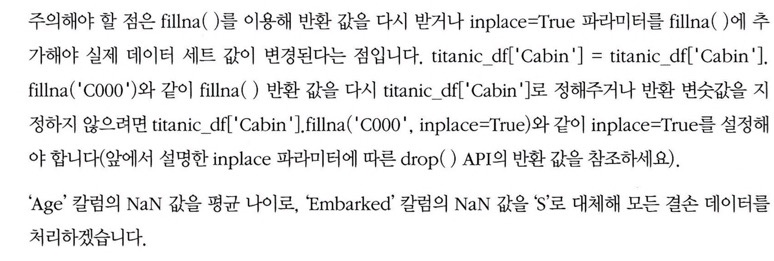

In [208]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## apply lambda 식으로 데이터 가공

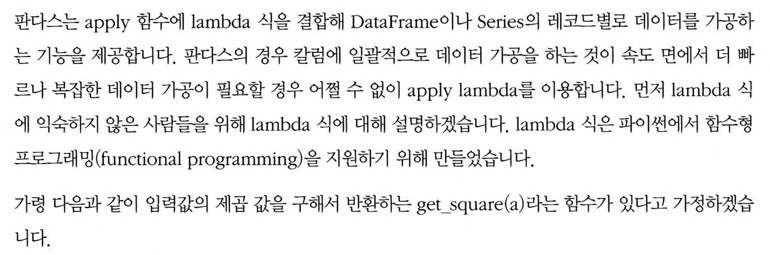

In [209]:
def get_square(a):
  return a**2

print('3의 제곱은:', get_square(3))

3의 제곱은: 9


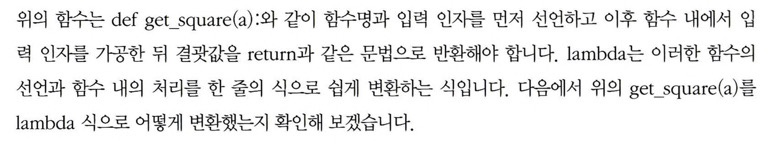

In [210]:
lambda_square = lambda x: x**2
print('3의 제곱은:', lambda_square(3))

3의 제곱은: 9


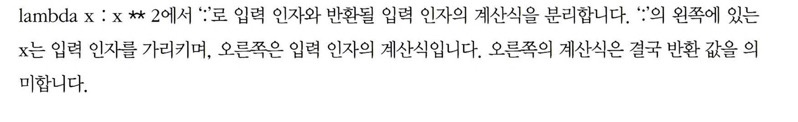

In [211]:
a = [1,2,3]
squares = map(lambda x: x**2 , a)
list(squares)

[1, 4, 9]

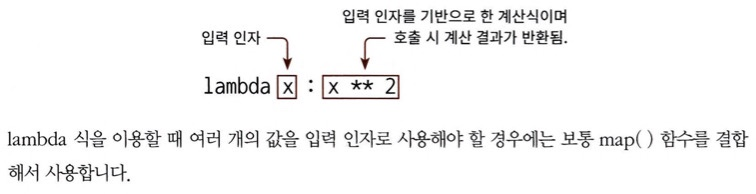

In [217]:
a = [1,2,3]
squares = map(lambda x: x**2, a)
list(squares)

[1, 4, 9]

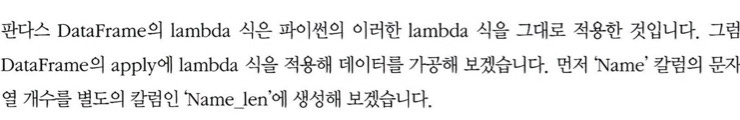

In [212]:
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x:len(x))
titanic_df[['Name','Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr....",23
1,"Cumings, Mr...",51
2,"Heikkinen, ...",22


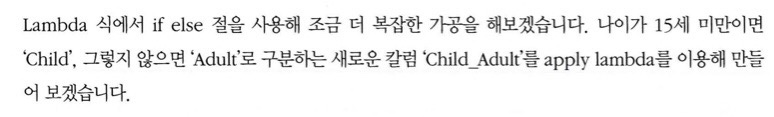

In [213]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x<= 15 else 'Adult')
titanic_df[['Age','Child_Adult']].head(8)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child


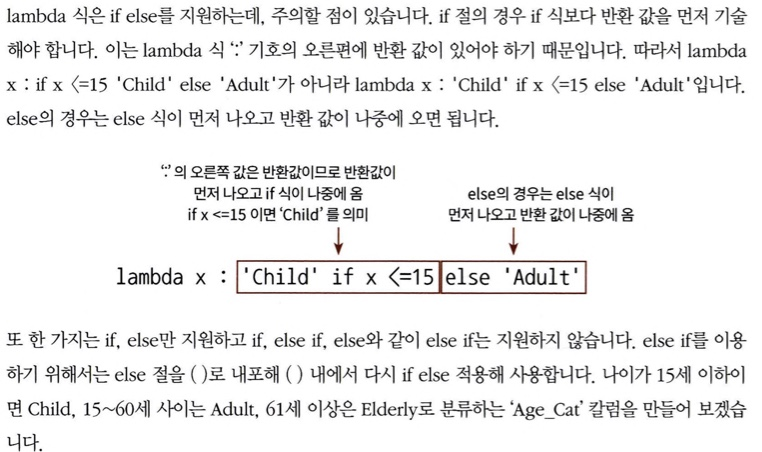

In [214]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: 'Child' if x<=15 else ('Adult' if x <= 60 else 'Elderly'))
titanic_df['Age_cat'].value_counts()

,count
Age_cat,
Adult,786
Child,83
Elderly,22


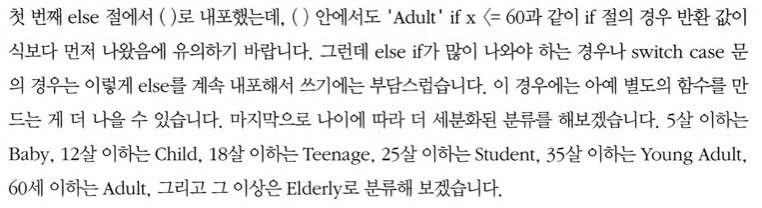

In [216]:
# 나이에 따라세분화된 분류를 수행하는 함수 생성
def get_category(age):
  cat = ''
  if age <= 5: cat = 'Baby'
  elif age<=12: cat = 'Child'
  elif age<=18: cat = 'Teenager'
  elif age<=25: cat = 'Student'
  elif age<=35: cat = 'Young Adult'
  elif age<=60: cat = 'Adult'
  else: cat = 'Elderly'

  return cat

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정.
# get_category(x) 는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
titanic_df[['Age','Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


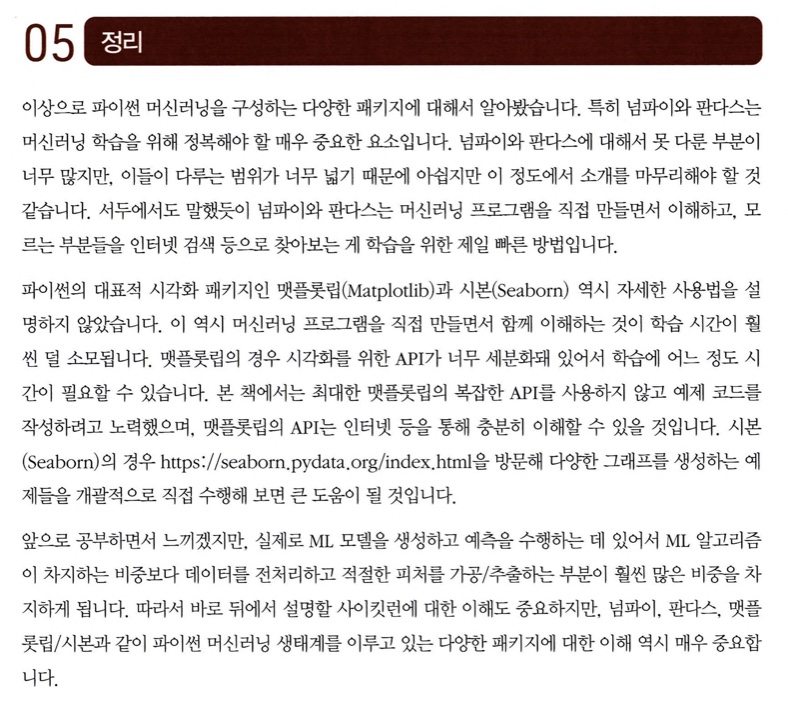